In [22]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("oral_cancer_prediction_dataset.csv", delimiter=",", encoding='utf-8')

Descrierea inițială a bazei de date 

In [3]:
df.describe()

,ID,Age,Tumor Size (cm),Cancer Stage,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year)
count,84922.000000,84922.000000,84922.000000,84922.000000,84922.000000,84922.000000,84922.000000
mean,42461.500000,54.509444,1.747294,1.118756,79.503364,39109.881244,52.028391
std,24515.014117,10.014839,2.028199,1.340418,26.483746,44710.687054,60.389796
min,1.000000,15.000000,0.000000,0.000000,10.000750,0.000000,0.000000
25%,21231.250000,48.000000,0.000000,0.000000,65.233425,0.000000,0.000000
50%,42461.500000,55.000000,0.000000,0.000000,100.000000,0.000000,0.000000
75%,63691.750000,61.000000,3.480075,2.000000,100.000000,76468.437500,104.000000
max,84922.000000,101.000000,5.999899,4.000000,100.000000,159988.000000,179.000000


Vizualizarea ultimelor 5 rânduri din baz de date nemodificată

In [6]:
df.tail(5)

,ID,Country,Age,Gender,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Chronic Sun Exposure,Poor Oral Hygiene,...,Difficulty Swallowing,White or Red Patches in Mouth,Tumor Size (cm),Cancer Stage,Treatment Type,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year),Early Diagnosis,Oral Cancer (Diagnosis)
84917,84918,USA,46,Male,Yes,No,No,No,No,Yes,...,No,Yes,0.000000,0,No Treatment,100.000000,0.0,0,Yes,No
84918,84919,USA,41,Male,Yes,Yes,No,No,No,No,...,Yes,Yes,0.000000,0,No Treatment,100.000000,0.0,0,Yes,No
84919,84920,Taiwan,72,Male,Yes,Yes,No,Yes,No,Yes,...,No,No,4.777394,1,Surgery,85.633426,81352.5,90,No,Yes
84920,84921,Japan,67,Male,Yes,No,No,No,No,No,...,Yes,No,0.000000,0,No Treatment,100.000000,0.0,0,Yes,No
84921,84922,Pakistan,75,Male,Yes,No,No,Yes,Yes,No,...,No,No,0.000000,0,No Treatment,100.000000,0.0,0,No,No


Vizualizarea tipurilor de date inițiale

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84922 entries, 0 to 84921
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ID                                        84922 non-null  int64  
 1   Country                                   84922 non-null  object 
 2   Age                                       84922 non-null  int64  
 3   Gender                                    84922 non-null  object 
 4   Tobacco Use                               84922 non-null  object 
 5   Alcohol Consumption                       84922 non-null  object 
 6   HPV Infection                             84922 non-null  object 
 7   Betel Quid Use                            84922 non-null  object 
 8   Chronic Sun Exposure                      84922 non-null  object 
 9   Poor Oral Hygiene                         84922 non-null  object 
 10  Diet (Fruits & Vegetables Intake) 

Verificarea existenței valorilor de tip unknown și a valorilor negative

In [8]:
(df == 'unknown').sum()

ID                                          0
Country                                     0
Age                                         0
Gender                                      0
Tobacco Use                                 0
Alcohol Consumption                         0
HPV Infection                               0
Betel Quid Use                              0
Chronic Sun Exposure                        0
Poor Oral Hygiene                           0
Diet (Fruits & Vegetables Intake)           0
Family History of Cancer                    0
Compromised Immune System                   0
Oral Lesions                                0
Unexplained Bleeding                        0
Difficulty Swallowing                       0
White or Red Patches in Mouth               0
Tumor Size (cm)                             0
Cancer Stage                                0
Treatment Type                              0
Survival Rate (5-Year, %)                   0
Cost of Treatment (USD)           

In [9]:
(df.select_dtypes(include='number') < 0).sum()

ID                                          0
Age                                         0
Tumor Size (cm)                             0
Cancer Stage                                0
Survival Rate (5-Year, %)                   0
Cost of Treatment (USD)                     0
Economic Burden (Lost Workdays per Year)    0
dtype: int64

Înlocuirea coloanelor de tip YES/NO cu valori de tip 1/0

In [4]:
# Înlocuiește valorile 'Yes' cu 1 și 'No' cu 0 în toate coloanele care le conțin
df = df.applymap(lambda x: 1 if str(x).strip().lower() == 'yes' else (0 if str(x).strip().lower() == 'no' else x))
df.info()

C:\Users\HP\AppData\Local\Temp\ipykernel_2480\3519682278.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: 1 if str(x).strip().lower() == 'yes' else (0 if str(x).strip().lower() == 'no' else x))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84922 entries, 0 to 84921
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ID                                        84922 non-null  int64  
 1   Country                                   84922 non-null  object 
 2   Age                                       84922 non-null  int64  
 3   Gender                                    84922 non-null  object 
 4   Tobacco Use                               84922 non-null  int64  
 5   Alcohol Consumption                       84922 non-null  int64  
 6   HPV Infection                             84922 non-null  int64  
 7   Betel Quid Use                            84922 non-null  int64  
 8   Chronic Sun Exposure                      84922 non-null  int64  
 9   Poor Oral Hygiene                         84922 non-null  int64  
 10  Diet (Fruits & Vegetables Intake) 

On-hot encoding pe coloanele categorice

In [5]:
# Selectează coloanele categorice
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# One hot encoding
df = pd.get_dummies(df, columns=categorical_columns)

# Conversie coloane booleene în 0 și 1
for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)

# Salvează într-un fișier nou
df.to_csv('baza_date_one_hot.csv', index=False)

print("Datele au fost salvate cu succes!")

print(df.head())

Datele au fost salvate cu succes!
   ID  Age  Tobacco Use  Alcohol Consumption  HPV Infection  Betel Quid Use  \
0   1   36            1                    1              1               0   
1   2   64            1                    1              1               0   
2   3   37            0                    1              0               0   
3   4   55            1                    1              0               1   
4   5   68            0                    0              0               0   

   Chronic Sun Exposure  Poor Oral Hygiene  Family History of Cancer  \
0                     0                  1                         0   
1                     1                  1                         0   
2                     1                  1                         0   
3                     0                  1                         0   
4                     0                  1                         0   

   Compromised Immune System  ...  Gender_Female  Gender_M

Verificarea rezultatelor obținute după one-hot encoding

In [6]:
df.tail(1)

,ID,Age,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Chronic Sun Exposure,Poor Oral Hygiene,Family History of Cancer,Compromised Immune System,...,Gender_Female,Gender_Male,Diet (Fruits & Vegetables Intake)_High,Diet (Fruits & Vegetables Intake)_Low,Diet (Fruits & Vegetables Intake)_Moderate,Treatment Type_Chemotherapy,Treatment Type_No Treatment,Treatment Type_Radiation,Treatment Type_Surgery,Treatment Type_Targeted Therapy
84921,84922,75,1,0,0,1,1,0,0,0,...,0,1,1,0,0,0,1,0,0,0


In [13]:
all_numeric = df.dtypes.apply(lambda x: x in ['int64', 'float64'])
print(all_numeric)
print("Doar coloane numerice (int sau float):", all(all_numeric))

ID                                            True
Age                                           True
Tobacco Use                                   True
Alcohol Consumption                           True
HPV Infection                                 True
Betel Quid Use                                True
Chronic Sun Exposure                          True
Poor Oral Hygiene                             True
Family History of Cancer                      True
Compromised Immune System                     True
Oral Lesions                                  True
Unexplained Bleeding                          True
Difficulty Swallowing                         True
White or Red Patches in Mouth                 True
Tumor Size (cm)                               True
Cancer Stage                                  True
Survival Rate (5-Year, %)                     True
Cost of Treatment (USD)                       True
Economic Burden (Lost Workdays per Year)      True
Early Diagnosis                

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84922 entries, 0 to 84921
Data columns (total 48 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   ID                                          84922 non-null  int64  
 1   Age                                         84922 non-null  int64  
 2   Tobacco Use                                 84922 non-null  int64  
 3   Alcohol Consumption                         84922 non-null  int64  
 4   HPV Infection                               84922 non-null  int64  
 5   Betel Quid Use                              84922 non-null  int64  
 6   Chronic Sun Exposure                        84922 non-null  int64  
 7   Poor Oral Hygiene                           84922 non-null  int64  
 8   Family History of Cancer                    84922 non-null  int64  
 9   Compromised Immune System                   84922 non-null  int64  
 10  Oral Lesio

Realizarea unei histograme pe o anumită coloană

array([[<Axes: title={'center': 'Tumor Size (cm)'}>]], dtype=object)

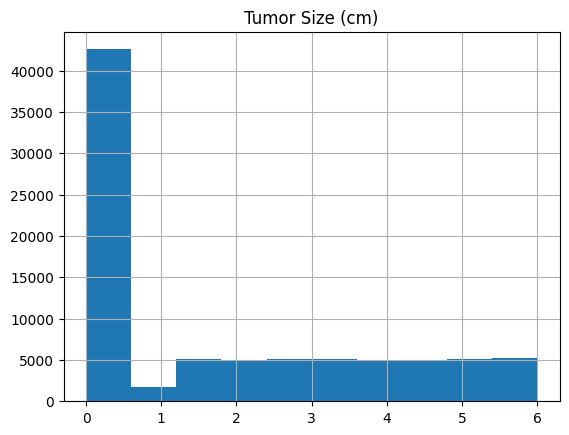

In [7]:
df.hist('Tumor Size (cm)')

Realizarea matricei de corelație

In [6]:
df_numeric = df.select_dtypes(include=['number'])  # Selectează doar coloanele numerice
df_numeric.corr()

,ID,Age,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Chronic Sun Exposure,Poor Oral Hygiene,Family History of Cancer,Compromised Immune System,...,Gender_Female,Gender_Male,Diet (Fruits & Vegetables Intake)_High,Diet (Fruits & Vegetables Intake)_Low,Diet (Fruits & Vegetables Intake)_Moderate,Treatment Type_Chemotherapy,Treatment Type_No Treatment,Treatment Type_Radiation,Treatment Type_Surgery,Treatment Type_Targeted Therapy
ID,1.000000,-0.000287,0.001864,0.002526,-0.000726,-0.001081,0.006251,-0.006670,-0.000278,-0.001335,...,0.001391,-0.001391,-0.006693,0.002418,0.003064,-0.001659,-0.000146,-0.001825,0.000680,0.003043
Age,-0.000287,1.000000,-0.002956,0.004203,0.000654,-0.000492,0.001241,0.007398,0.002745,-0.000198,...,-0.006699,0.006699,0.002525,-0.000478,-0.001590,0.004244,-0.000300,-0.000935,-0.001866,-0.000967
Tobacco Use,0.001864,-0.002956,1.000000,0.002585,-0.001543,-0.002488,-0.000089,-0.002865,-0.001410,-0.001800,...,0.000606,-0.000606,-0.002422,-0.000200,0.002183,0.000063,-0.001425,-0.003028,0.003030,0.002251
Alcohol Consumption,0.002526,0.004203,0.002585,1.000000,0.001577,0.000070,0.006014,0.005483,-0.000563,0.001200,...,-0.002252,0.002252,-0.000919,0.002850,-0.002097,-0.003596,0.001469,0.002672,0.001956,-0.003417
HPV Infection,-0.000726,0.000654,-0.001543,0.001577,1.000000,0.004885,0.000729,0.001396,0.003244,-0.008817,...,0.003842,-0.003842,0.003939,-0.004466,0.001239,0.001052,-0.001732,0.003210,0.001711,-0.003139
Betel Quid Use,-0.001081,-0.000492,-0.002488,0.000070,0.004885,1.000000,-0.004162,-0.003185,0.003246,0.001619,...,-0.001163,0.001163,-0.001915,-0.000641,0.002209,0.005097,-0.001537,-0.001741,-0.005323,0.004469
Chronic Sun Exposure,0.006251,0.001241,-0.000089,0.006014,0.000729,-0.004162,1.000000,-0.002924,0.000695,0.000316,...,-0.005901,0.005901,0.001520,-0.000274,-0.000971,-0.005873,0.000092,0.000141,0.007765,-0.002177
Poor Oral Hygiene,-0.006670,0.007398,-0.002865,0.005483,0.001396,-0.003185,-0.002924,1.000000,0.000824,-0.000178,...,-0.002725,0.002725,-0.001500,0.000301,0.000928,-0.004923,0.005469,-0.002488,0.000441,-0.001962
Family History of Cancer,-0.000278,0.002745,-0.001410,-0.000563,0.003244,0.003246,0.000695,0.000824,1.000000,-0.001902,...,-0.002475,0.002475,0.002118,-0.001641,-0.000094,-0.000662,0.000835,0.000864,0.000897,-0.002461
Compromised Immune System,-0.001335,-0.000198,-0.001800,0.001200,-0.008817,0.001619,0.000316,-0.000178,-0.001902,1.000000,...,0.000347,-0.000347,0.002667,-0.000501,-0.001684,0.011050,-0.004771,-0.003578,-0.001328,0.001612


Afișarea celor mai bune corelații(coloane) care au valoarea corelației între 0.8-1, respectiv -1,-0.8

In [17]:
# Selectează doar coloanele numerice
df_numeric = df.select_dtypes(include=['number'])

# Calculează matricea de corelații
correlation_matrix = df_numeric.corr()

# Creează un dicționar pentru a reține cele mai puternice corelații (în afară de diagonala principală)
strongest_correlations = {}

for col in correlation_matrix.columns:
    correlations = correlation_matrix[col].drop(labels=[col])
    most_correlated_col = correlations.abs().idxmax()
    correlation_value = correlation_matrix[col][most_correlated_col]
    strongest_correlations[col] = (most_correlated_col, correlation_value)

# Transformă rezultatul într-un DataFrame
strongest_corr_df = pd.DataFrame([
    {'Coloana Principală': col, 'Coloana Corelată': pair[0], 'Valoare Corelație': pair[1]}
    for col, pair in strongest_correlations.items()
])

# Filtrare după corelații puternice: > 0.8 sau < -0.8
strong_corr_filtered = strongest_corr_df[strongest_corr_df['Valoare Corelație'].abs() >= 0.8]

# Afișare rezultat
print(strong_corr_filtered)


                          Coloana Principală           Coloana Corelată  \
14                           Tumor Size (cm)    Oral Cancer (Diagnosis)   
15                              Cancer Stage  Survival Rate (5-Year, %)   
16                 Survival Rate (5-Year, %)               Cancer Stage   
17                   Cost of Treatment (USD)    Oral Cancer (Diagnosis)   
18  Economic Burden (Lost Workdays per Year)    Oral Cancer (Diagnosis)   
20                   Oral Cancer (Diagnosis)    Cost of Treatment (USD)   
38                             Gender_Female                Gender_Male   
39                               Gender_Male              Gender_Female   
44               Treatment Type_No Treatment    Oral Cancer (Diagnosis)   

    Valoare Corelație  
14           0.863781  
15          -0.986458  
16          -0.986458  
17           0.877048  
18           0.863823  
20           0.877048  
38          -1.000000  
39          -1.000000  
44          -0.817392  


In [7]:
# Convertim valorile Yes/No în 1/0
#df['Oral Cancer (Diagnosis)'] = df['Oral Cancer (Diagnosis)'].map({'Yes': 1, 'No': 0})

# Definim targetul și atributele
target_col = 'Oral Cancer (Diagnosis)'
features = df.drop(columns=[target_col])
target = df[target_col]

# Funcție eficientă pentru calculul Gini Index
def gini_index_fast(feature, target):
    grouped = target.groupby(feature)
    gini = 0.0
    total = len(target)

    for _, group in grouped:
        p1 = group.mean()
        p0 = 1 - p1
        gini_split = 1 - p1**2 - p0**2
        gini += (len(group) / total) * gini_split

    return gini

# Calculăm Gini Index pentru toate coloanele
gini_scores = {
    col: gini_index_fast(features[col], target)
    for col in features.columns
}

# Sortăm rezultatele și le punem într-un DataFrame
gini_df = pd.DataFrame(gini_scores.items(), columns=['Atribut', 'Gini Index']).sort_values(by='Gini Index')

# Afișăm rezultatul
print(gini_df)


                                       Atribut  Gini Index
0                                           ID    0.000000
14                             Tumor Size (cm)    0.000000
15                                Cancer Stage    0.000000
16                   Survival Rate (5-Year, %)    0.000000
17                     Cost of Treatment (USD)    0.000000
18    Economic Burden (Lost Workdays per Year)    0.000000
43                 Treatment Type_No Treatment    0.165934
42                 Treatment Type_Chemotherapy    0.443878
45                      Treatment Type_Surgery    0.444090
46             Treatment Type_Targeted Therapy    0.444346
44                    Treatment Type_Radiation    0.444733
1                                          Age    0.499525
35                                  Country_UK    0.499976
31                              Country_Russia    0.499977
29                             Country_Nigeria    0.499977
30                            Country_Pakistan    0.4999

Gini Index Global

In [8]:
target = df['Oral Cancer (Diagnosis)']

# Proporțiile claselor
p0 = (target == 0).mean()
p1 = (target == 1).mean()

# Formula Gini Index
gini_index = 1 - (p0 ** 2 + p1 ** 2)

print(f"Gini Index global pentru 'Oral Cancer (Diagnosis)': {gini_index:.4f}")

Gini Index global pentru 'Oral Cancer (Diagnosis)': 0.5000


In [21]:
def gini_split(df, feature, target):
    gini_total = 0
    total_len = len(df)
    
    for val in df[feature].unique():
        subset = df[df[feature] == val]
        subset_len = len(subset)
        
        p0 = (subset[target] == 0).mean()
        p1 = (subset[target] == 1).mean()
        
        gini = 1 - (p0**2 + p1**2)
        gini_total += (subset_len / total_len) * gini

    return gini_total

# Presupunem că DataFrame-ul tău se numește df
# și conține coloana țintă 'Oral Cancer (Diagnosis)'

# Excludem coloane nerelevante
excluded = ['ID', 'Oral Cancer (Diagnosis)']
feature_cols = [col for col in df.columns if col not in excluded]

# Calcul Gini Index pentru fiecare coloană explicativă
gini_scores = {col: gini_split(df, col, 'Oral Cancer (Diagnosis)') for col in feature_cols}

# Convertim în DataFrame și sortăm crescător (cel mai bun split în top)
gini_df = pd.DataFrame(list(gini_scores.items()), columns=['Feature', 'Gini_Index'])
gini_df = gini_df.sort_values(by='Gini_Index', ascending=True)

# Afișăm rezultatul final
print(gini_df)

                                       Feature  Gini_Index
15                   Survival Rate (5-Year, %)    0.000000
13                             Tumor Size (cm)    0.000000
14                                Cancer Stage    0.000000
16                     Cost of Treatment (USD)    0.000000
17    Economic Burden (Lost Workdays per Year)    0.000000
42                 Treatment Type_No Treatment    0.165934
41                 Treatment Type_Chemotherapy    0.443878
44                      Treatment Type_Surgery    0.444090
45             Treatment Type_Targeted Therapy    0.444346
43                    Treatment Type_Radiation    0.444733
0                                          Age    0.499525
34                                  Country_UK    0.499976
30                              Country_Russia    0.499977
28                             Country_Nigeria    0.499977
29                            Country_Pakistan    0.499980
8                    Compromised Immune System    0.4999

In [23]:
# Funcție pentru calcul Gini Index pentru un split
def gini_split(df, feature, target):
    gini_total = 0
    total_len = len(df)
    
    for val in df[feature].unique():
        subset = df[df[feature] == val]
        subset_len = len(subset)
        
        p0 = (subset[target] == 0).mean()
        p1 = (subset[target] == 1).mean()
        
        gini = 1 - (p0**2 + p1**2)
        gini_total += (subset_len / total_len) * gini

    return gini_total

# Excludem coloanele nerelevante
excluded = ['ID', 'Oral Cancer (Diagnosis)']
feature_cols = [col for col in df.columns if col not in excluded and df[col].nunique() > 1]

# Calculăm Gini Index pentru fiecare coloană explicativă
gini_scores = {col: gini_split(df, col, 'Oral Cancer (Diagnosis)') for col in feature_cols}

# Transformăm în DataFrame și sortăm
gini_df = pd.DataFrame(list(gini_scores.items()), columns=['Feature', 'Gini_Index'])
gini_df = gini_df.sort_values(by='Gini_Index', ascending=True)

# Afișăm cele mai bune 5 și cele mai slabe 5
print("Top 5 cele mai bune splituri (cel mai mic Gini Index):")
print(gini_df.head(5), end="\n\n")

print(" Top 5 cele mai slabe splituri (cel mai mare Gini Index):")
print(gini_df.tail(5))


Top 5 cele mai bune splituri (cel mai mic Gini Index):
                                     Feature  Gini_Index
15                 Survival Rate (5-Year, %)         0.0
13                           Tumor Size (cm)         0.0
14                              Cancer Stage         0.0
16                   Cost of Treatment (USD)         0.0
17  Economic Burden (Lost Workdays per Year)         0.0

 Top 5 cele mai slabe splituri (cel mai mare Gini Index):
                                  Feature  Gini_Index
36                          Gender_Female    0.499996
39  Diet (Fruits & Vegetables Intake)_Low    0.499996
10                   Unexplained Bleeding    0.499996
19                      Country_Australia    0.499997
11                  Difficulty Swallowing    0.499997


Calculul entropiei

In [24]:
# Funcție pentru calculul entropiei pe split
def entropy_split(df, feature, target):
    entropy_total = 0
    total_len = len(df)

    for val in df[feature].unique():
        subset = df[df[feature] == val]
        subset_len = len(subset)
        
        p0 = (subset[target] == 0).mean()
        p1 = (subset[target] == 1).mean()
        
        # Tratăm cazurile în care p0 sau p1 = 0 (ca să nu avem log2(0))
        ent = 0
        if p0 > 0:
            ent -= p0 * np.log2(p0)
        if p1 > 0:
            ent -= p1 * np.log2(p1)

        entropy_total += (subset_len / total_len) * ent

    return entropy_total

# Excludem coloane nerelevante
excluded = ['ID', 'Oral Cancer (Diagnosis)']
feature_cols = [col for col in df.columns if col not in excluded and df[col].nunique() > 1]

# Calculăm entropia pentru fiecare coloană explicativă
entropy_scores = {col: entropy_split(df, col, 'Oral Cancer (Diagnosis)') for col in feature_cols}

# Transformăm în DataFrame și sortăm
entropy_df = pd.DataFrame(list(entropy_scores.items()), columns=['Feature', 'Entropy'])
entropy_df = entropy_df.sort_values(by='Entropy', ascending=True)

# Afișăm top 5 cele mai bune splituri (entropie cea mai mică) și cele mai slabe 5
print("🔝 Top 5 cele mai bune splituri (entropie minimă):")
print(entropy_df.head(5), end="\n\n")

print("🔻 Top 5 cele mai slabe splituri (entropie maximă):")
print(entropy_df.tail(5))


🔝 Top 5 cele mai bune splituri (entropie minimă):
                                     Feature  Entropy
15                 Survival Rate (5-Year, %)      0.0
13                           Tumor Size (cm)      0.0
14                              Cancer Stage      0.0
16                   Cost of Treatment (USD)      0.0
17  Economic Burden (Lost Workdays per Year)      0.0

🔻 Top 5 cele mai slabe splituri (entropie maximă):
                                  Feature   Entropy
36                          Gender_Female  0.999995
39  Diet (Fruits & Vegetables Intake)_Low  0.999995
10                   Unexplained Bleeding  0.999995
19                      Country_Australia  0.999995
11                  Difficulty Swallowing  0.999995


Combinarea Gini Index si Entropie

In [26]:
# --- Funcție combinată pentru Gini Index și Entropie ---
def gini_and_entropy(df, feature, target):
    total_len = len(df)
    grouped = df.groupby(feature)[target]
    
    gini_total = 0
    entropy_total = 0

    for name, group in grouped:
        subset_len = len(group)
        p0 = (group == 0).mean()
        p1 = (group == 1).mean()

        # Gini
        gini = 1 - (p0 ** 2 + p1 ** 2)
        gini_total += (subset_len / total_len) * gini

        # Entropie
        ent = 0
        if p0 > 0:
            ent -= p0 * np.log2(p0)
        if p1 > 0:
            ent -= p1 * np.log2(p1)
        entropy_total += (subset_len / total_len) * ent

    return gini_total, entropy_total

# --- Selectăm coloanele explicative ---
excluded = ['ID', 'Oral Cancer (Diagnosis)']
feature_cols = [col for col in df.columns if col not in excluded and df[col].nunique() > 1]

# --- Calcul Gini & Entropie pentru toate coloanele ---
results = []
for col in feature_cols:
    gini, entropy = gini_and_entropy(df, col, 'Oral Cancer (Diagnosis)')
    results.append({'Feature': col, 'Gini_Index': gini, 'Entropy': entropy})

# --- Creăm DataFrame-ul final și îl sortăm după Gini Index ---
comparison_df = pd.DataFrame(results)
comparison_df = comparison_df.sort_values(by='Gini_Index').reset_index(drop=True)

# --- Afișăm toate rezultatele (nu doar top 5) ---
pd.set_option('display.max_rows', None)  # Afișează toate rândurile
print(comparison_df)


                                       Feature  Gini_Index   Entropy
0                    Survival Rate (5-Year, %)    0.000000  0.000000
1                              Tumor Size (cm)    0.000000  0.000000
2                                 Cancer Stage    0.000000  0.000000
3                      Cost of Treatment (USD)    0.000000  0.000000
4     Economic Burden (Lost Workdays per Year)    0.000000  0.000000
5                  Treatment Type_No Treatment    0.165934  0.388858
6                  Treatment Type_Chemotherapy    0.443878  0.891029
7                       Treatment Type_Surgery    0.444090  0.891430
8              Treatment Type_Targeted Therapy    0.444346  0.891914
9                     Treatment Type_Radiation    0.444733  0.892647
10                                         Age    0.499525  0.999288
11                                  Country_UK    0.499976  0.999965
12                              Country_Russia    0.499977  0.999967
13                             Cou

Impartirea setului dupa regula 70-30

In [9]:
# definim X (features) si y (target)
X = df.drop(columns=['Oral Cancer (Diagnosis)', 'ID'])  # scoatem coloana tinta si ID
y = df['Oral Cancer (Diagnosis)']

# split 70% - 30%


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# verificare dimensiuni
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


X_train: (59445, 46)
X_test: (25477, 46)
y_train: (59445,)
y_test: (25477,)


Regresie Logistica

In [10]:
# 1. Creăm modelul
log_model = LogisticRegression(max_iter=1000, random_state=42)

# 2. Antrenăm modelul pe setul de antrenare
log_model.fit(X_train, y_train)

# 3. Facem predicții pe setul de test
y_pred = log_model.predict(X_test)

# 4. Obținem probabilitățile (pentru ROC AUC)
y_proba = log_model.predict_proba(X_test)[:, 1]

# 5. Calculăm metricile de performanță
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

# 6. Afișăm rezultatele
print("Logistic Regression Results:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"ROC AUC:   {roc_auc:.4f}")
print("Confusion Matrix:")
print(conf_matrix)


Logistic Regression Results:
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1 Score:  1.0000
ROC AUC:   1.0000
Confusion Matrix:
[[12772     0]
 [    0 12705]]


Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# 1. Creăm modelul Random Forest
rf_model = RandomForestClassifier(random_state=42)

# 2. Antrenăm modelul pe setul de antrenare
rf_model.fit(X_train, y_train)

# 3. Facem predicții pe setul de test
y_pred_rf = rf_model.predict(X_test)

# 4. Obținem probabilitățile (pentru ROC AUC)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# 5. Calculăm metricile de performanță
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# 6. Afișăm rezultatele
print("Random Forest Results:")
print(f"Accuracy:  {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall:    {recall_rf:.4f}")
print(f"F1 Score:  {f1_rf:.4f}")
print(f"ROC AUC:   {roc_auc_rf:.4f}")
print("Confusion Matrix:")
print(conf_matrix_rf)


Random Forest Results:
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1 Score:  1.0000
ROC AUC:   1.0000
Confusion Matrix:
[[12772     0]
 [    0 12705]]


In [12]:
print(y.value_counts())

Oral Cancer (Diagnosis)
0    42573
1    42349
Name: count, dtype: int64


In urma rularii celor 2 metode am observat ca rezultatele sunt perfecte (amandoua au scoruri de 100%). Dupa o analiza scurta a matricei de corelatii a bazei de date existente pana acuma, am observat ca se iau in calcul si coloane care tin de ce se intampla dupa punerea diagnosticului.
Coloana mea tinta este Oral Cancer (0 daca nu are cancer oral si 1 in caz contrar).
Mai pe scurt am coloane care tin de ce se intampla in viitor si care afecteaza antrenarea. Mai jos le voi elimina.
Coloane eliminate:
- Cost of Treatment (USD)
- Economic Burden (Lost Workdays per Year)
- Tumor Size (cm)
- Cancer Stage
- Survival Rate (5-Year, %)
- Treatment Type (toate variantele) 

In [13]:
df = pd.read_csv('baza_date_one_hot.csv')

In [14]:
# Eliminare coloane cu scurgeri de informatie
leakage_columns = [
    'Cost of Treatment (USD)',
    'Economic Burden (Lost Workdays per Year)',
    'Tumor Size (cm)',
    'Cancer Stage',
    'Survival Rate (5-Year, %)',
    'Treatment Type_No Treatment',
    'Treatment Type_Chemotherapy',
    'Treatment Type_Surgery',
    'Treatment Type_Targeted Therapy',
    'Treatment Type_Radiation'
]

# Separare X si y
X = df.drop(columns=leakage_columns + ['Oral Cancer (Diagnosis)', 'ID'])
y = df['Oral Cancer (Diagnosis)']

# Split train-test 70%-30%
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


X_train: (59445, 36)
X_test: (25477, 36)
y_train: (59445,)
y_test: (25477,)


Metoda Logistic Regression pentru noul eliminarea coloanelor

In [15]:
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
y_proba_log = log_model.predict_proba(X_test)[:,1]

print("\nRezultate Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))
print("F1 Score:", f1_score(y_test, y_pred_log))
print("ROC AUC:", roc_auc_score(y_test, y_proba_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))


Rezultate Logistic Regression:
Accuracy: 0.4995093613847784
Precision: 0.4979923184357542
Recall: 0.4490358126721763
F1 Score: 0.4722486652042548
ROC AUC: 0.49936681702262664
Confusion Matrix:
 [[7021 5751]
 [7000 5705]]


Metoda Random Forest

In [16]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:,1]

print("\nRezultate Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_proba_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Rezultate Random Forest:
Accuracy: 0.5017859245594065
Precision: 0.5004808462894694
Recall: 0.491538764266037
F1 Score: 0.4959695032363102
ROC AUC: 0.49996101209195193
Confusion Matrix:
 [[6539 6233]
 [6460 6245]]


Comparatie clara intre cele 2 metode. In cazul dat, mai bun e Random Forest.

In [21]:
# Construim tabelul de comparatie
comparison_df = pd.DataFrame({
    "Metrică": [
        "Accuracy", 
        "Precision", 
        "Recall", 
        "F1 Score", 
        "ROC AUC"
    ],
    "Ce înseamnă": [
        "Procentul total de predicții corecte",
        "Din totalul de cazuri prezise ca pozitive (cancer), câte au fost corecte",
        "Din totalul cazurilor reale de cancer, câte au fost corect identificate",
        "Media armonică între Precision și Recall (echilibru între ele)",
        "Capacitatea modelului de a separa cazurile pozitive de cele negative"
    ],
    "Logistic Regression": [
        round(accuracy_score(y_test, y_pred_log), 4),
        round(precision_score(y_test, y_pred_log), 4),
        round(recall_score(y_test, y_pred_log), 4),
        round(f1_score(y_test, y_pred_log), 4),
        round(roc_auc_score(y_test, y_proba_log), 4)
    ],
    "Random Forest": [
        round(accuracy_score(y_test, y_pred_rf), 4),
        round(precision_score(y_test, y_pred_rf), 4),
        round(recall_score(y_test, y_pred_rf), 4),
        round(f1_score(y_test, y_pred_rf), 4),
        round(roc_auc_score(y_test, y_proba_rf), 4)
    ]
})

# Afișăm tabelul
print(comparison_df)

     Metrică                                        Ce înseamnă  \
0   Accuracy               Procentul total de predicții corecte   
1  Precision  Din totalul de cazuri prezise ca pozitive (can...   
2     Recall  Din totalul cazurilor reale de cancer, câte au...   
3   F1 Score  Media armonică între Precision și Recall (echi...   
4    ROC AUC  Capacitatea modelului de a separa cazurile poz...   

   Logistic Regression  Random Forest  
0               0.4995         0.5018  
1               0.4980         0.5005  
2               0.4490         0.4915  
3               0.4722         0.4960  
4               0.4994         0.5000  


Metoda Naive Bayes

In [17]:
# Creare model Naive Bayes
nb_model = GaussianNB()

# Antrenare model
nb_model.fit(X_train, y_train)

# Predicții
y_pred_nb = nb_model.predict(X_test)
y_proba_nb = nb_model.predict_proba(X_test)[:, 1]

# Afișare rezultate Naive Bayes
print("Rezultate Naive Bayes:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Precision:", precision_score(y_test, y_pred_nb))
print("Recall:", recall_score(y_test, y_pred_nb))
print("F1 Score:", f1_score(y_test, y_pred_nb))
print("ROC AUC:", roc_auc_score(y_test, y_proba_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

Rezultate Naive Bayes:
Accuracy: 0.5038269811987283
Precision: 0.5023474178403756
Recall: 0.539000393545848
F1 Score: 0.5200288567414664
ROC AUC: 0.502573100247701
Confusion Matrix:
 [[5988 6784]
 [5857 6848]]


Tabel comparativ intre cele 3 metode 

In [18]:
# Tabel comparativ între toate modelele
comparison_df = pd.DataFrame({
    "Metrică": [
        "Accuracy", 
        "Precision", 
        "Recall", 
        "F1 Score", 
        "ROC AUC"
    ],
    "Ce înseamnă": [
        "Procentul total de predicții corecte",
        "Din totalul de cazuri prezise ca pozitive (cancer), câte au fost corecte",
        "Din totalul cazurilor reale de cancer, câte au fost corect identificate",
        "Media armonică între Precision și Recall (echilibru între ele)",
        "Capacitatea modelului de a separa cazurile pozitive de cele negative"
    ],
    "Logistic Regression": [
        round(accuracy_score(y_test, y_pred_log), 4),
        round(precision_score(y_test, y_pred_log), 4),
        round(recall_score(y_test, y_pred_log), 4),
        round(f1_score(y_test, y_pred_log), 4),
        round(roc_auc_score(y_test, y_proba_log), 4)
    ],
    "Random Forest": [
        round(accuracy_score(y_test, y_pred_rf), 4),
        round(precision_score(y_test, y_pred_rf), 4),
        round(recall_score(y_test, y_pred_rf), 4),
        round(f1_score(y_test, y_pred_rf), 4),
        round(roc_auc_score(y_test, y_proba_rf), 4)
    ],
    "Naive Bayes": [
        round(accuracy_score(y_test, y_pred_nb), 4),
        round(precision_score(y_test, y_pred_nb), 4),
        round(recall_score(y_test, y_pred_nb), 4),
        round(f1_score(y_test, y_pred_nb), 4),
        round(roc_auc_score(y_test, y_proba_nb), 4)
    ]
})

# Afisam tabel comparativ
print("\nTabel comparativ intre modele:")
print(comparison_df)


Tabel comparativ intre modele:
     Metrică                                        Ce înseamnă  \
0   Accuracy               Procentul total de predicții corecte   
1  Precision  Din totalul de cazuri prezise ca pozitive (can...   
2     Recall  Din totalul cazurilor reale de cancer, câte au...   
3   F1 Score  Media armonică între Precision și Recall (echi...   
4    ROC AUC  Capacitatea modelului de a separa cazurile poz...   

   Logistic Regression  Random Forest  Naive Bayes  
0               0.4995         0.5018       0.5038  
1               0.4980         0.5005       0.5023  
2               0.4490         0.4915       0.5390  
3               0.4722         0.4960       0.5200  
4               0.4994         0.5000       0.5026  


In urma aplicarii celor 3 metode pe mine in matricea de confuzie ma intereseaza casuta FN ( fals negative) deoarece atentia se concentreaza pe rezultatele care au prezis ca persoana nu are cancer si de fapt sa aiba. Astfel:
1. Metoda Logistic Regression : 7000
2. Metoda Random Forest : 6460
3. Metoda Naive Bayes : 5857

Optimizare hiperparametri pentru cele 2 metode : Random Forest si Regression Optimizat

In [23]:
# Random Forest - Optimizare hiperparametri
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, scoring='recall', n_jobs=-1)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_

# Predictii Random Forest optimizat
y_pred_rf_opt = best_rf.predict(X_test)
y_proba_rf_opt = best_rf.predict_proba(X_test)[:, 1]

print("Random Forest Optimizat")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_opt))
print("Precision:", precision_score(y_test, y_pred_rf_opt))
print("Recall:", recall_score(y_test, y_pred_rf_opt))
print("F1 Score:", f1_score(y_test, y_pred_rf_opt))
print("ROC AUC:", roc_auc_score(y_test, y_proba_rf_opt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_opt))

Random Forest Optimizat
Accuracy: 0.4967225340503199
Precision: 0.49531812725090035
Recall: 0.4871310507674144
F1 Score: 0.4911904761904762
ROC AUC: 0.4954575066004898
Confusion Matrix:
 [[6466 6306]
 [6516 6189]]


In [25]:
param_grid_log = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

grid_log = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid_log, cv=3, scoring='recall', n_jobs=-1)
grid_log.fit(X_train, y_train)
best_log = grid_log.best_estimator_

# Predictii Logistic Regression optimizat
y_pred_log_opt = best_log.predict(X_test)
y_proba_log_opt = best_log.predict_proba(X_test)[:, 1]

print("\nLogistic Regression Optimizat")
print("Accuracy:", accuracy_score(y_test, y_pred_log_opt))
print("Precision:", precision_score(y_test, y_pred_log_opt))
print("Recall:", recall_score(y_test, y_pred_log_opt))
print("F1 Score:", f1_score(y_test, y_pred_log_opt))
print("ROC AUC:", roc_auc_score(y_test, y_proba_log_opt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_opt))


Logistic Regression Optimizat
Accuracy: 0.4995093613847784
Precision: 0.4979923184357542
Recall: 0.4490358126721763
F1 Score: 0.4722486652042548
ROC AUC: 0.49936681702262664
Confusion Matrix:
 [[6466 6306]
 [6516 6189]]


In urma celor 2 optimizari am vazut rezultate mai bune. Diferenta la rezultate a fost asa de mica incat nu se merita optimizarile pentru ca consuma mai mult timp. 
Exemplu pentru random forest:
1. Recall cu parametrii optimizati : 0.4871310507674144
2. Recall initial: 0.491538764266037

Analiza Datelor

In [26]:
# Creare tabel comparativ intre modele
comparatie_modele = pd.DataFrame({
    "Metrică": [
        "Accuracy",
        "Precision",
        "Recall",
        "F1 Score",
        "ROC AUC"
    ],
    "Logistic Regression": [
        0.4995,
        0.4980,
        0.4490,
        0.4722,
        0.4994
    ],
    "Random Forest": [
        0.5018,
        0.5005,
        0.4915,
        0.4960,
        0.5000
    ],
    "Naive Bayes": [
        0.5038,
        0.5023,
        0.5390,
        0.5200,
        0.5026
    ]
})

# Afisam tabelul
print(comparatie_modele)

     Metrică  Logistic Regression  Random Forest  Naive Bayes
0   Accuracy               0.4995         0.5018       0.5038
1  Precision               0.4980         0.5005       0.5023
2     Recall               0.4490         0.4915       0.5390
3   F1 Score               0.4722         0.4960       0.5200
4    ROC AUC               0.4994         0.5000       0.5026


In urma tabelului de mai sus se poate vedea ca:
- Metoda Logistic Regression are cele mai slabe rezultate, Recall (ce ma intereseaza pe mine cel mai mult) este cel mai mic 0.4490, chiar si matricea de confuzie are la aceasta metoda FN cel mai mare de 7000.
- Metoda Random Forest este una usor mai buna decat cea anterioara, dar in continuare da multe rateuri la FN 6460.
- Ultima metoda aleasa de mine (Naive Bayes) a dat cele mai bune rezultate, cu o crestere semnificativa a Recall-ului de 0.5390, si chiar si FN este cel mai bun aici de 5857.

In concluzie aleg Metoda Naive Bayes pentru ca are din toate puctele de vedere cele mai bune rezultate.